# Diabetes Prediction Using Machine Learning 

## Importing Libraries  

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Reading Dataset

In [268]:
data = pd.read_csv('diabetes.csv')

## Display Top 5 Rows of the dataset

In [269]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


##  Check Last 5 Rows of The Dataset

In [270]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


## Find Shape of Our Dataset (Number of Rows And Number of Columns)


In [271]:
data.shape

(2000, 9)

In [272]:
print("Number of Rows:",data.shape[0])
print("Number of Columns:",data.shape[1])

Number of Rows: 2000
Number of Columns: 9


## Get Overall Statistics About The Outcome

In [273]:
data["Outcome"].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

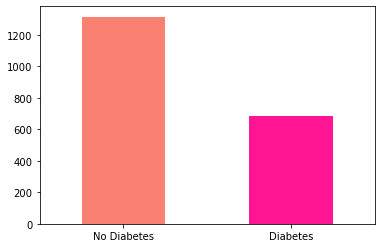

In [274]:
data["Outcome"].value_counts().plot(kind="bar",color=["salmon","deeppink"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0);

## Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement


In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


## Comparing Glucose with the Outcome 

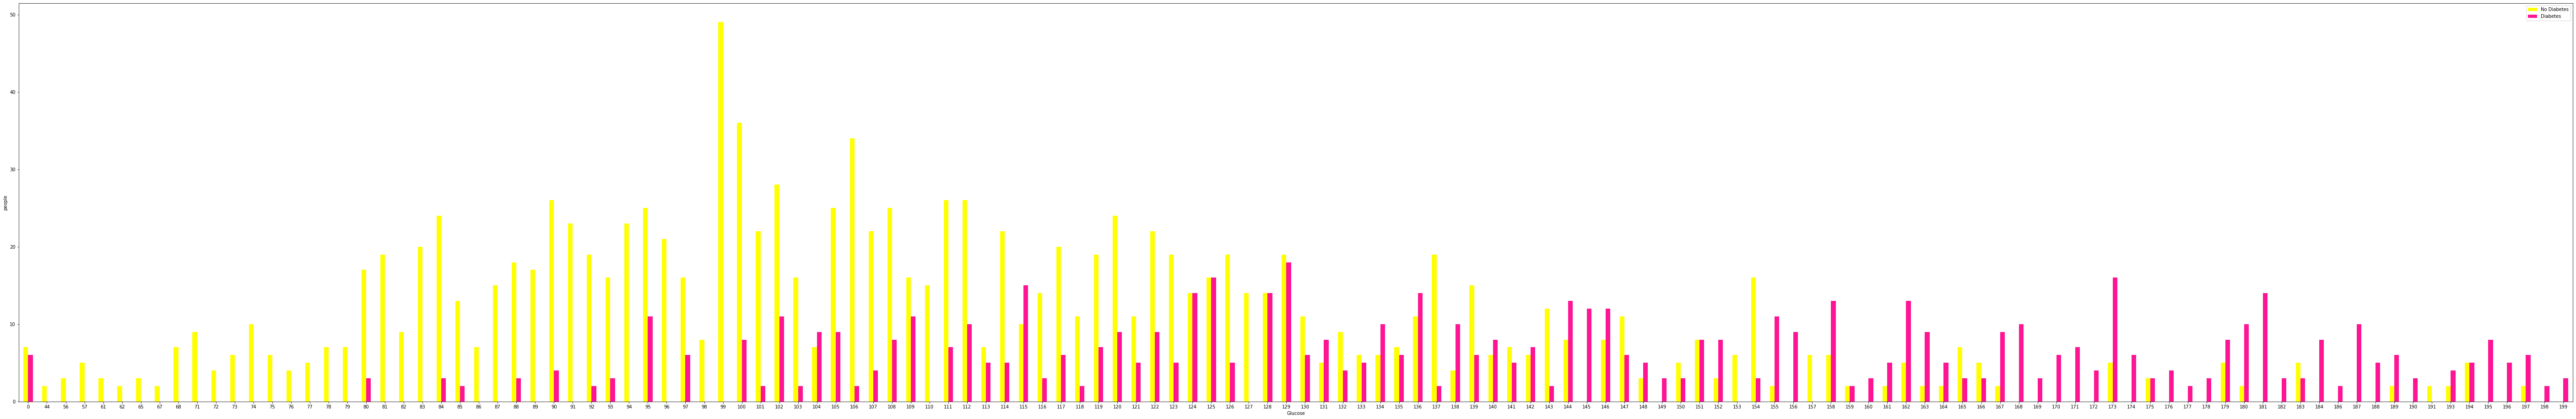

In [276]:
pd.crosstab(data.Glucose,data.Outcome).plot(kind="bar",figsize=(100,16),color=["yellow","deeppink"])
plt.ylabel("people");
plt.xticks(rotation=0);
plt.legend(['No Diabetes', 'Diabetes']);

## Finding out the Blood Pressure and age of entries who have diabetes

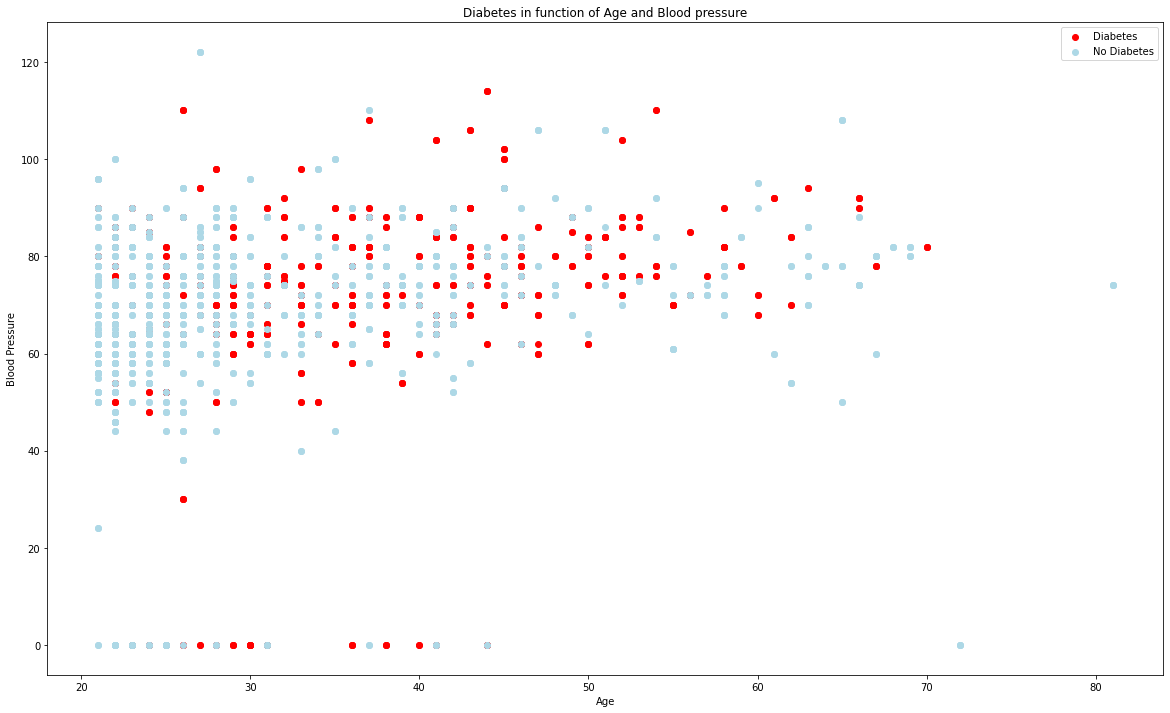

In [277]:
plt.figure(figsize=(20,12))
# Scatter with positive example
plt.scatter(data.Age[data.Outcome==1],data.BloodPressure[data.Outcome==1],c="Red");

# Scatter with negative example
plt.scatter(data.Age[data.Outcome==0],data.BloodPressure[data.Outcome==0],c="lightblue");

# Add some helpful info
plt.title("Diabetes in function of Age and Blood pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["Diabetes","No Diabetes"]);

## Histogram of all coloumns when the Outcome is 1(Diabetes) 

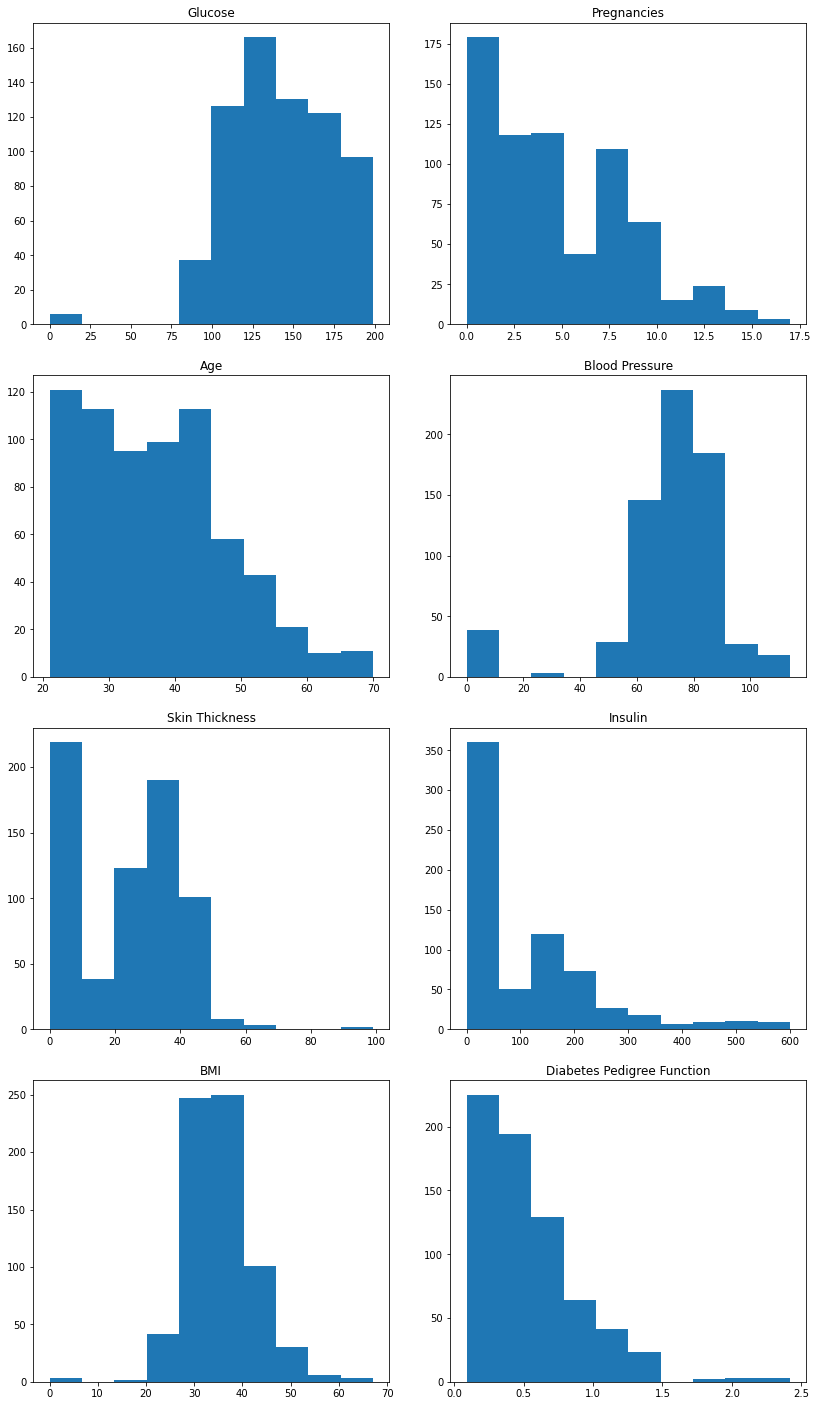

In [278]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose')
ax[0,0].hist(data.Glucose[data.Outcome==1]);
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(data.Pregnancies[data.Outcome==1]);
ax[1,0].set_title('Age')
ax[1,0].hist(data.Age[data.Outcome==1]);
ax[1,1].set_title('Blood Pressure')
ax[1,1].hist(data.BloodPressure[data.Outcome==1]);
ax[2,0].set_title('Skin Thickness')
ax[2,0].hist(data.SkinThickness[data.Outcome==1]);
ax[2,1].set_title('Insulin')
ax[2,1].hist(data.Insulin[data.Outcome==1]);
ax[3,0].set_title('BMI')
ax[3,0].hist(data.BMI[data.Outcome==1]);
ax[3,1].set_title('Diabetes Pedigree Function')
ax[3,1].hist(data.DiabetesPedigreeFunction[data.Outcome==1]);

##  Make our correlation matrix visual 

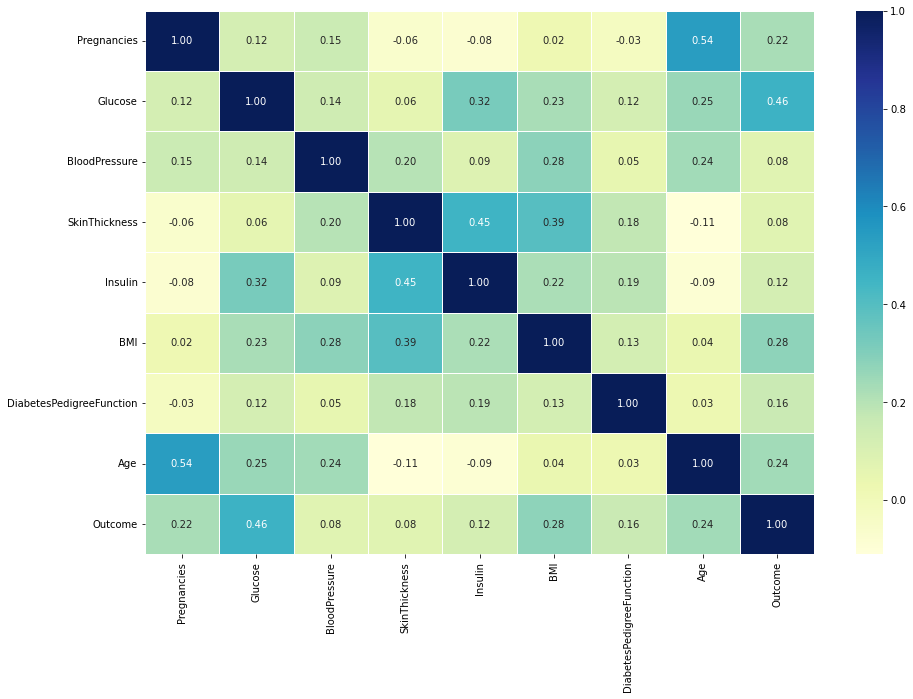

In [279]:
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu")

## Check Null Values In The Dataset


In [280]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Get Overall Statistics About The Dataset


In [281]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


## To Know count of zeros in columns

In [282]:
data_copy = data.copy(deep=True)

In [283]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [284]:
data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,np.nan)

In [285]:
data_copy.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Replace zero by mean

In [286]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

## Split The Dataset Into input and ouput

In [287]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [288]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138.0,62.0000,35.000,80.254,33.6,0.127,47
1,0,84.0,82.0000,31.000,125.000,38.2,0.233,23
2,0,145.0,69.1455,20.935,80.254,44.2,0.630,31
3,0,135.0,68.0000,42.000,250.000,42.3,0.365,24
4,1,139.0,62.0000,41.000,480.000,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1995,2,75.0,64.0000,24.000,55.000,29.7,0.370,33
1996,8,179.0,72.0000,42.000,130.000,32.7,0.719,36
1997,6,85.0,78.0000,20.935,80.254,31.2,0.382,42
1998,0,129.0,110.0000,46.000,130.000,67.1,0.319,26


## Splitting The Dataset Into The Training Set And Test Set

In [289]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,
                                               random_state=42)


## Scaling data

In [290]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)

In [291]:
X_train .shape

(1600, 8)

In [292]:
X_test.shape

(400, 8)

# Modeling : 

## LogisticRegression

In [293]:
lr=LogisticRegression(C=100)
lr=lr.fit(X_train,y_train)

In [294]:
lr.score(X_train,y_train)

0.77

In [295]:
lr_score = lr.score(X_test,y_test)
lr_score

0.7775

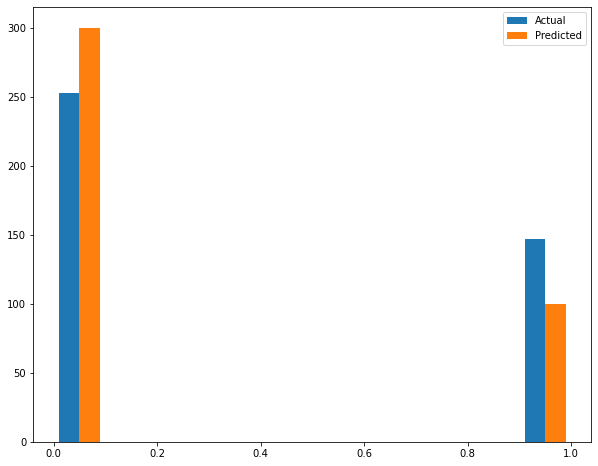

In [296]:
y_pre = lr.predict(X_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pre})
plt.figure(figsize=(10,8))
plt.hist(df)
plt.legend(["Actual" , "Predicted"])

## KNN Classifier

In [297]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [298]:
knn.score(X_train,y_train)

0.89875

In [299]:
knn_score = knn.score(X_test,y_test)
knn_score

0.7925

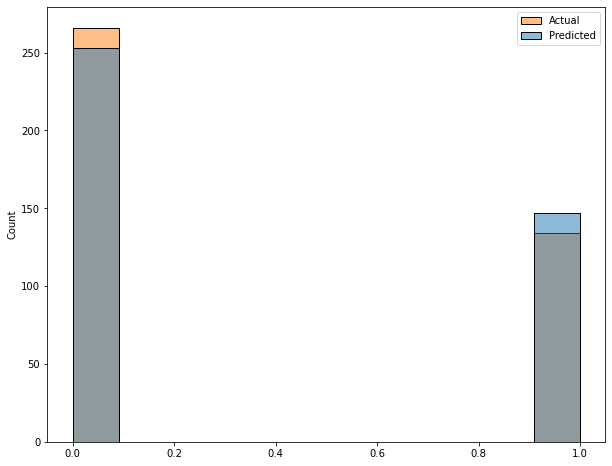

In [300]:
y_pre = knn.predict(X_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pre})
plt.figure(figsize=(10,8))
sns.histplot(df)
plt.legend(["Actual" , "Predicted"])

## Decision tree

In [361]:
dt=DecisionTreeClassifier(max_features=8 , max_depth=12)

In [362]:
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=12, max_features=8)

In [363]:
dt_score = dt.score(X_train,y_train)
dt_score

0.99375

In [364]:
dt.score(X_test,y_test)

0.915

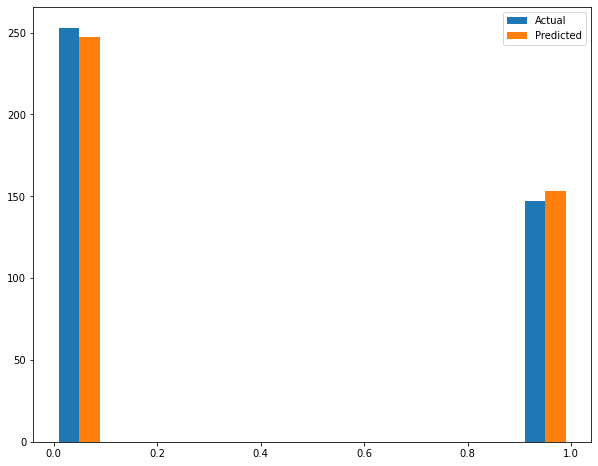

In [365]:
y_pre = dt.predict(X_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pre})
plt.figure(figsize=(10,8))
plt.hist(df)
plt.legend(["Actual" , "Predicted"])

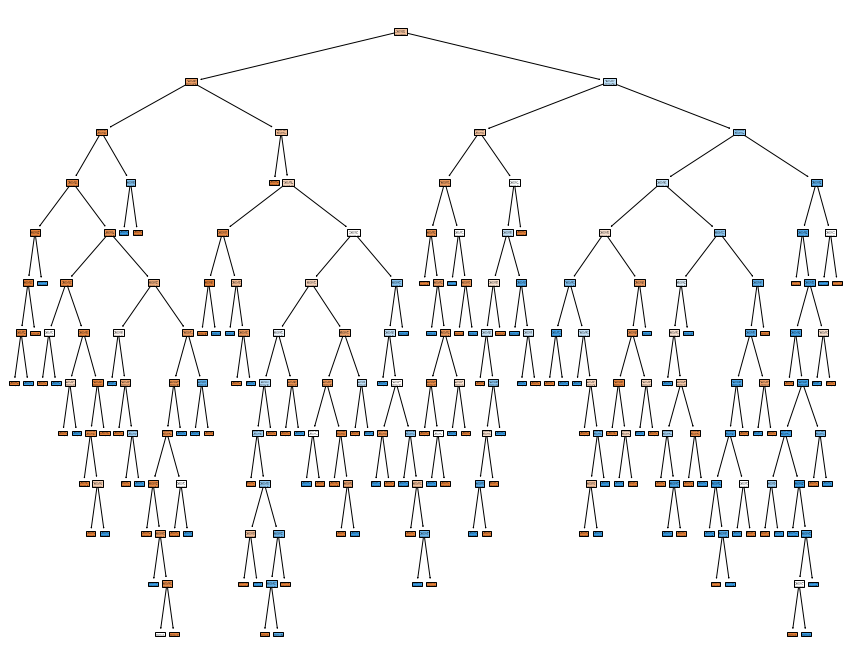

In [366]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)
plt.show()

## Compersion between models

In [367]:
models = ['logistic Regression' , 'knn','decision tree']
accur = [[lr_score] , [knn_score],[dt_score]]
cols = ["score"]
pd.DataFrame(data = accur , index = models , columns = cols)

,score
logistic Regression,0.77750
knn,0.79250
decision tree,0.99375


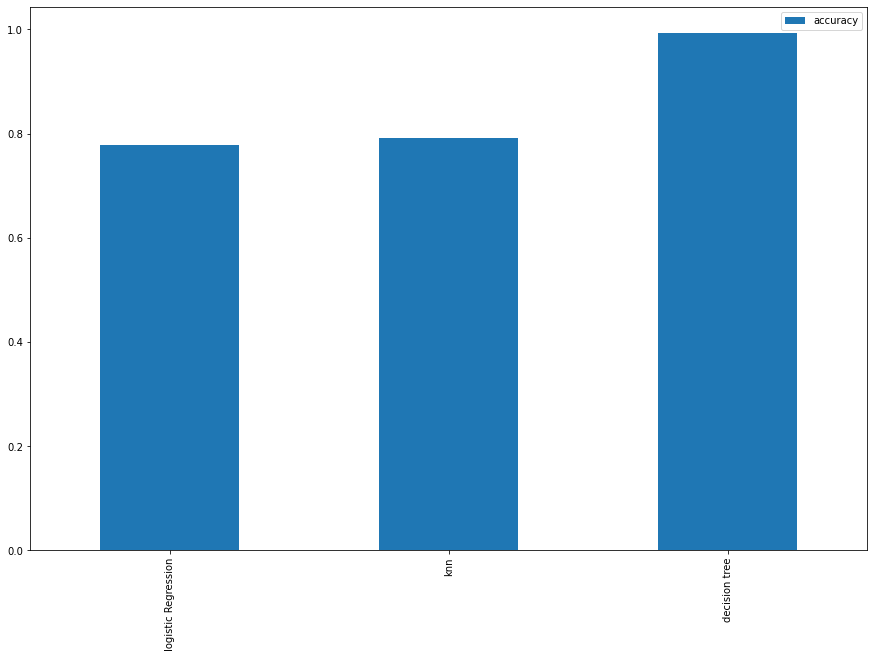

In [368]:
acc_results = {'logistic Regression': lr_score,
                            'knn': knn_score,
                            'decision tree': dt_score}
model_compare = pd.DataFrame(acc_results,index=["accuracy"])
model_compare.T.plot.bar(figsize=(15,10));

## Prediction on New Data 

In [ ]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [369]:
new_data = pd.DataFrame({
    'Pregnancies':6,
    'Glucose':148.0,
    'BloodPressure':72.0,
    'SkinThickness':35.0,
    'Insulin':79.799479,
    'BMI':33.6,
    'DiabetesPedigreeFunction':0.627,
    'Age':50,    
},index=[0])

In [370]:
p = dt.predict(new_data)

In [371]:
if p[0] == 0:
    print('non-diabetic')
else:
    print('diabetic')

non-diabetic


## Save Model Using Joblib 

In [323]:
import joblib

In [324]:
joblib.dump(dt,'model_joblib_diabetes')

['model_joblib_diabetes']

In [325]:
model = joblib.load('model_joblib_diabetes')

In [326]:
model.predict(new_data)

array([0], dtype=int64)

## GUI 

In [327]:
from tkinter import *
import joblib

In [329]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
   
    model = joblib.load('model_joblib_diabetes')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8]])
    
    if result == 0:
        Label(master, text="Non-Diabetic").grid(row=31)
    else:
        Label(master, text="Diabetic").grid(row=31)
    
    
master = Tk()
master.title("Diabetes Prediction Using Machine Learning")


label = Label(master, text = "Diabetes Prediction Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Pregnancies").grid(row=1)
Label(master, text="Glucose").grid(row=2)
Label(master, text="Enter Value of BloodPressure").grid(row=3)
Label(master, text="Enter Value of SkinThickness").grid(row=4)
Label(master, text="Enter Value of Insulin").grid(row=5)
Label(master, text="Enter Value of BMI").grid(row=6)
Label(master, text="Enter Value of DiabetesPedigreeFunction").grid(row=7)
Label(master, text="Enter Value of Age").grid(row=8)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()